In [1]:
from sklearn.preprocessing import (
    PolynomialFeatures,
    MinMaxScaler)
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    PoissonRegressor
    )
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
full_source,ysource = fetch_openml(data_id=43927,return_X_y=True,as_frame=True)

full_source['Price'] = ysource

full_source['DATE']=pd.to_datetime(
    full_source['month'].astype(int).astype(str)+"/"+
    full_source['day'].astype(int).astype(str)+"/"+
    full_source['year'].astype(int).astype(str)
)

full_source.sort_values(by='DATE',ascending=True,inplace=True)

c:\Users\Jason\Desktop\git_control\ml-research\.venv\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mask = (full_source['region']=='WestTexNewMexico')&(full_source['type']=='organic')

In [4]:
source = full_source[mask].copy()

source.index = source['DATE'].values

In [5]:
source

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,Price,DATE
2015-01-04,6182.81,1561.30,2958.17,0.00,1663.34,1663.34,0.00,0.0,organic,2015.0,WestTexNewMexico,1.0,4.0,1.64,2015-01-04
2015-01-11,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015.0,WestTexNewMexico,1.0,11.0,1.69,2015-01-11
2015-01-18,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015.0,WestTexNewMexico,1.0,18.0,1.71,2015-01-18
2015-01-25,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,organic,2015.0,WestTexNewMexico,1.0,25.0,1.63,2015-01-25
2015-02-01,7210.19,1634.42,3012.44,0.00,2563.33,2563.33,0.00,0.0,organic,2015.0,WestTexNewMexico,2.0,1.0,1.77,2015-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018.0,WestTexNewMexico,2.0,25.0,1.57,2018-02-25
2018-03-04,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018.0,WestTexNewMexico,3.0,4.0,1.54,2018-03-04
2018-03-11,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018.0,WestTexNewMexico,3.0,11.0,1.56,2018-03-11
2018-03-18,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.0,organic,2018.0,WestTexNewMexico,3.0,18.0,1.56,2018-03-18


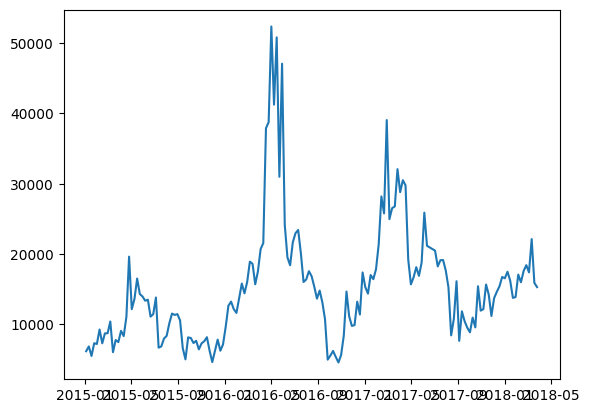

In [6]:
plt.plot(source['Total Volume'])

In [7]:

weeks = source['DATE'].dt.isocalendar().week

def sinu_feat(x,period=1,freq=53,func='sin'):

    if func=='sin':
        f = np.sin
    else:
        f = np.cos

    return f(2*np.pi*period*x/freq)

X = pd.DataFrame()
for f in ['sin','cos']:
    for p in [1,2,3,5,7]:
        X[f"SINU_{f.upper()}_{str(p)}"] = sinu_feat(weeks,period=p,freq=53,func=f)

X['PRICE'] = source['Price'].copy()


In [8]:
y = source['Total Volume'].copy()

In [54]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,
    test_size=.3,random_state=42,shuffle=False)



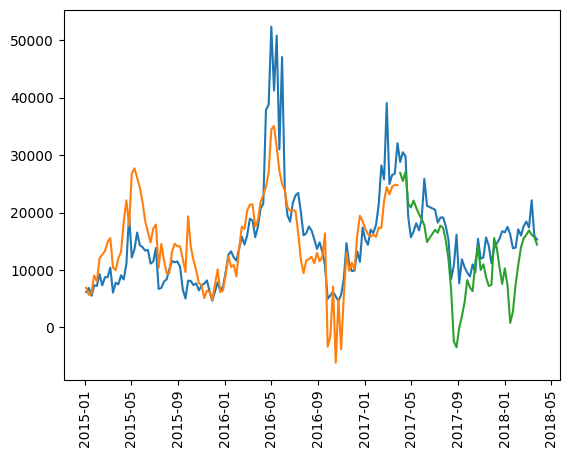

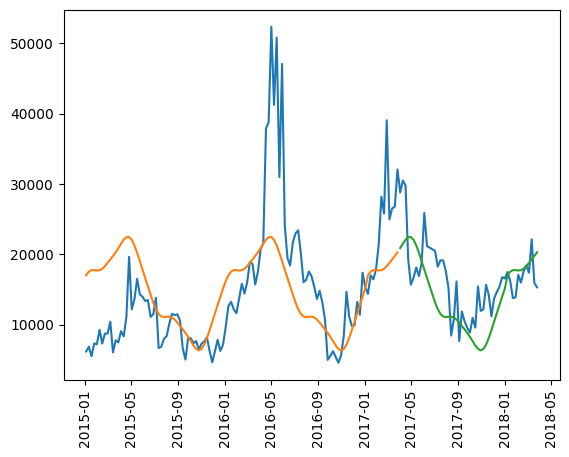

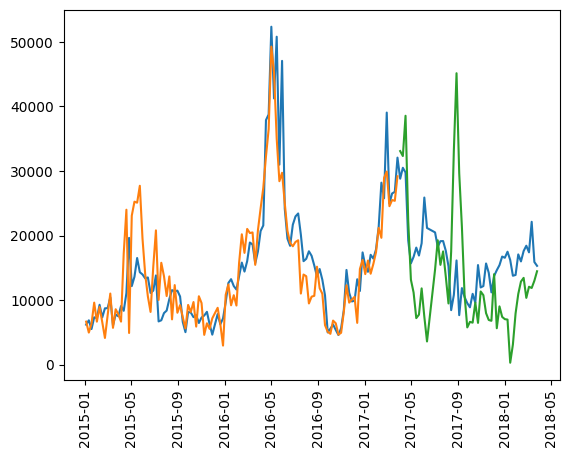

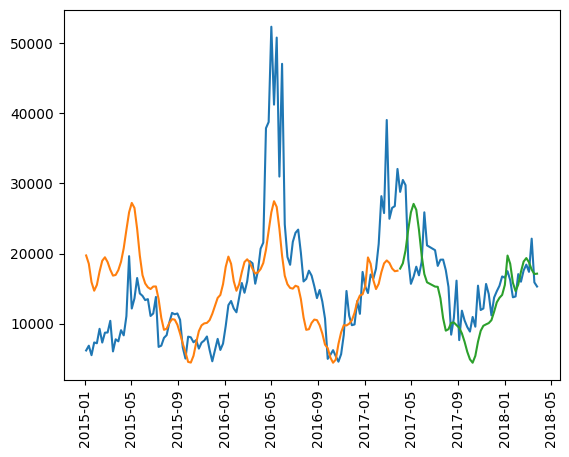

In [81]:
model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=1,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',LinearRegression(positive=False))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=1,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',LinearRegression(positive=True))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()


model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',LinearRegression(positive=False))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()


model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',LinearRegression(positive=True))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

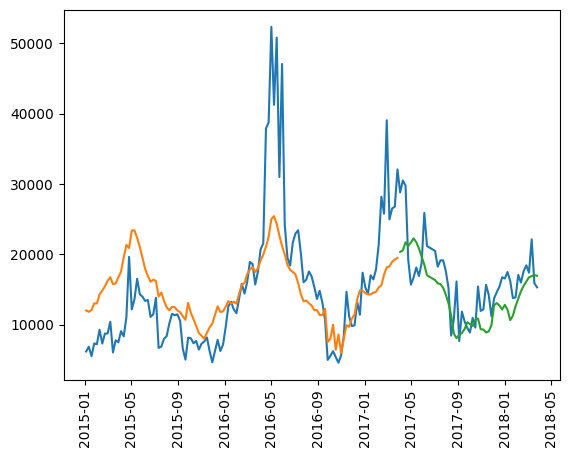

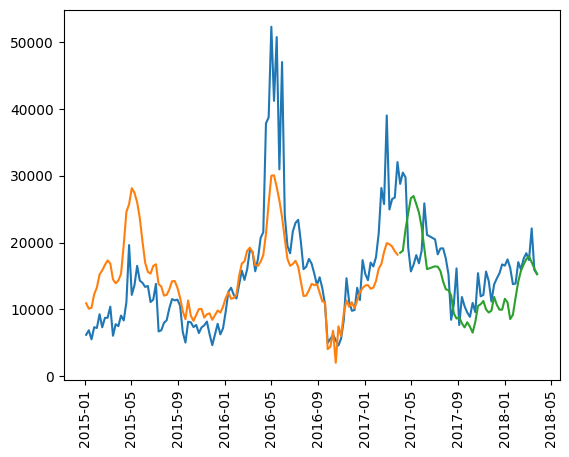

In [82]:
model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=1,interaction_only=False)),
        ('scaler',MinMaxScaler()),
        ('learner',Ridge(alpha=7.5,))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=2,interaction_only=False)),
        ('scaler',MinMaxScaler()),
        ('learner',Ridge(alpha=7.5,))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

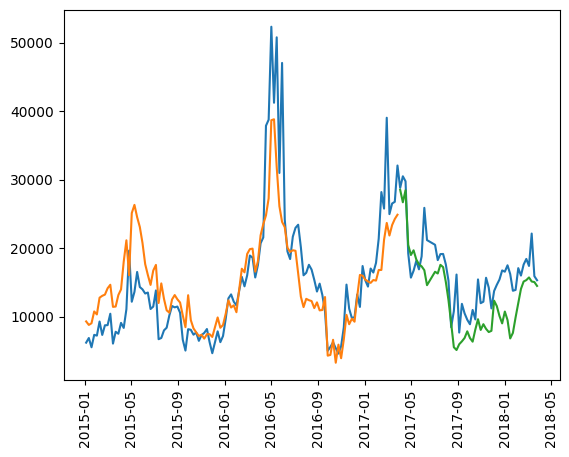

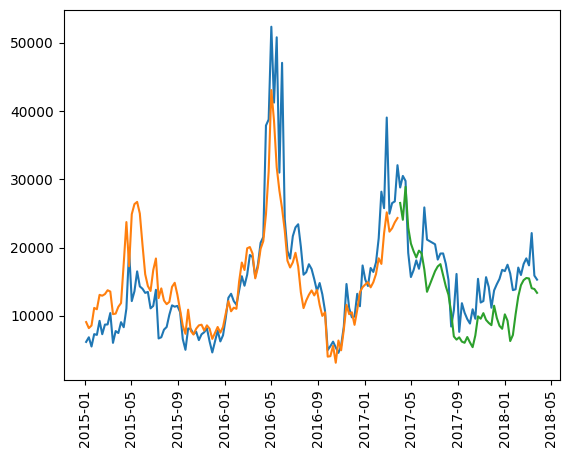

In [85]:
model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=1,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',PoissonRegressor(max_iter=100000,alpha=100,tol=1e-12,))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

model = Pipeline(
    steps = [
        ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
        ('scaler',MinMaxScaler()),
        ('learner',PoissonRegressor(max_iter=100000,alpha=100,tol=1e-12,))
    ]
).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),index = Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index = Xtest.index)

plt.plot(y)
plt.plot(yfit)
plt.plot(ypred)
plt.xticks(rotation=90)
plt.show()

In [37]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
poly.fit(Xtrain)

XtrainTransform = poly.transform(Xtrain)

In [38]:
XtrainTransform.shape

(149, 67)

In [39]:
Xtrain

,SINU_SIN_1,SINU_SIN_2,SINU_SIN_3,SINU_SIN_5,SINU_SIN_7,SINU_COS_1,SINU_COS_2,SINU_COS_3,SINU_COS_5,SINU_COS_7,PRICE
2015-01-04,0.118273,0.234886,0.348202,0.558647,0.737833,0.992981,0.972023,0.93742,0.829406,0.674983,1.64
2015-01-11,0.234886,0.456629,0.652822,0.92669,0.99605,0.972023,0.889657,0.757511,0.375828,-0.088796,1.69
2015-01-18,0.348202,0.652822,0.875735,0.978556,0.6068,0.93742,0.757511,0.482792,-0.205979,-0.794854,1.71
2015-01-25,0.456629,0.812487,0.98904,0.696551,-0.17689,0.889657,0.582979,0.147647,-0.717507,-0.984231,1.63
2015-02-01,0.558647,0.92669,0.978556,0.17689,-0.845596,0.829406,0.375828,-0.205979,-0.984231,-0.533823,1.77
...,...,...,...,...,...,...,...,...,...,...,...
2017-10-29,-0.92669,-0.696551,0.403123,0.348202,-0.902798,0.375828,-0.717507,-0.915146,0.93742,-0.430065,1.89
2017-11-05,-0.875735,-0.845596,0.059241,0.812487,-0.92669,0.482792,-0.533823,-0.998244,0.582979,0.375828,1.74
2017-11-12,-0.812487,-0.947326,-0.292057,0.999561,-0.348202,0.582979,-0.32027,-0.956401,0.029633,0.93742,1.80
2017-11-19,-0.737833,-0.99605,-0.6068,0.845596,0.456629,0.674983,-0.088796,-0.794854,-0.533823,0.889657,1.88
